O objetivo desse projeto é criar os sinais alpha de longo e curto periodo para criar um trading algoritmo.

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df = pd.read_csv('eod-quotemedia.csv')

In [3]:
df.shape

(490737, 3)

In [4]:
dados = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')

In [5]:
dados.shape

(1009, 495)

In [6]:
dados.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29.994186,16.176093,81.138217,53.109173,34.924478,50.863198,31.425388,64.694095,46.235,39.913360,...,27.668791,35.288928,76.320802,40.023873,22.106665,25.753386,45.480383,71.898827,27.858587,29.447893
2013-07-02,29.650137,15.819834,80.722073,54.312247,35.428076,50.696766,31.272881,64.712041,46.030,39.860576,...,27.542284,35.059033,76.608168,39.965530,22.082740,25.613675,45.402661,72.934172,28.038932,28.572441
2013-07-03,29.705185,16.127950,81.237299,54.612043,35.444862,50.937167,30.725650,65.214519,46.420,40.186077,...,27.334452,35.280086,76.650427,40.004426,22.202365,25.734758,46.063299,72.301458,28.181310,28.168387
2013-07-05,30.434568,16.214608,81.821882,54.173381,35.856134,51.371737,31.326707,66.075911,47.000,40.652334,...,27.695899,35.801771,77.394196,40.675380,22.585164,26.060750,46.413048,73.164246,29.396267,29.024598
2013-07-08,30.524021,16.310894,82.951417,53.865799,36.661889,52.037461,31.766285,66.820655,46.625,40.256455,...,27.985057,35.200507,77.968926,40.646208,22.489464,26.228403,46.950626,73.892823,29.576612,29.765365


In [7]:
dados.index = pd.to_datetime(dados.index)

In [8]:
dados.index

DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05',
               '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11',
               '2013-07-12', '2013-07-15',
               ...
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='date', length=1009, freq=None)

In [9]:
apple_ticker = 'AAPL'

In [10]:
def plot(dataset,titulo):
    fig = plt.figure(figsize=(14, 9))
    plt.plot(dataset.index,dataset[apple_ticker],label='Apple',color='blue')
    plt.title(titulo,fontsize=16)
    plt.legend(fontsize=16)

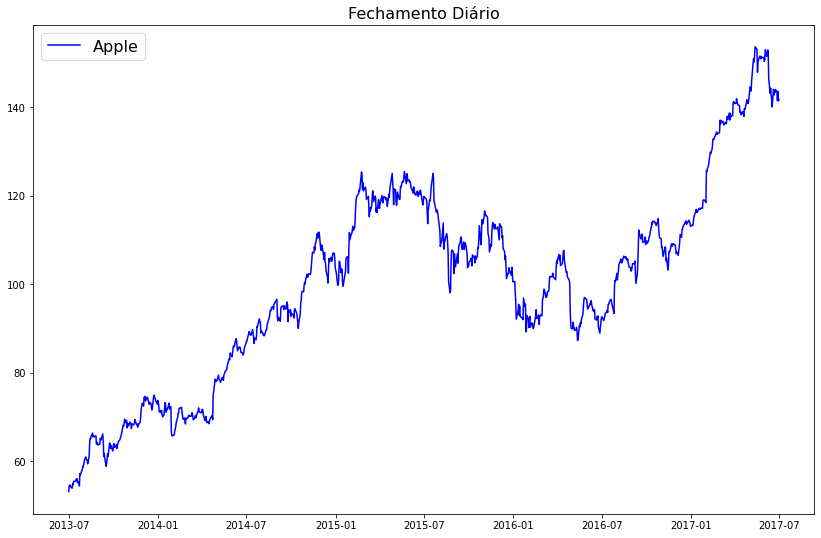

In [11]:
plot(dados,'Fechamento Diário')

O sinal alpha que eu quero gerar não será baseado no preço diário, mas sim no acuulado do mês para fazer trading uma vez por mês. Para isso eu vou fazer um reajuste nos preços de fechamento.


In [12]:
preco_reajustado = dados.resample('M').last()

In [13]:
preco_reajustado.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,30.778617,18.631393,81.732709,58.730009,38.521450,53.877450,32.990815,66.228449,47.28,43.441078,...,28.328432,41.283890,79.236714,41.696397,23.207213,23.219961,47.447784,80.028191,28.133851,28.740319
2013-08-31,32.092884,15.559861,79.334925,63.649943,36.090567,53.017321,30.018669,64.828687,45.75,41.013736,...,26.710955,38.600581,74.178477,40.830963,23.877112,23.188665,45.560804,75.819706,26.584661,28.104002
2013-09-30,35.346979,18.255876,81.982130,62.282664,37.886202,56.910722,29.892578,66.075911,51.94,41.696116,...,27.977014,41.650756,73.225288,42.277383,24.755162,26.136377,46.452239,78.936357,26.061902,30.003311
2013-10-31,35.009028,21.154093,98.342860,68.285838,41.396376,60.850696,33.055761,66.822997,54.22,43.690086,...,27.750075,40.386592,76.272087,45.870693,23.913149,32.417109,44.244047,84.058477,26.988611,30.585820
2013-11-30,36.947077,22.608016,100.157413,73.070375,41.396376,65.917191,34.538974,70.432348,56.78,42.732980,...,29.039087,39.716074,80.102213,46.313771,27.377429,32.473487,50.826346,87.844811,27.916745,30.093124


In [14]:
preco_reajustado.shape

(48, 495)

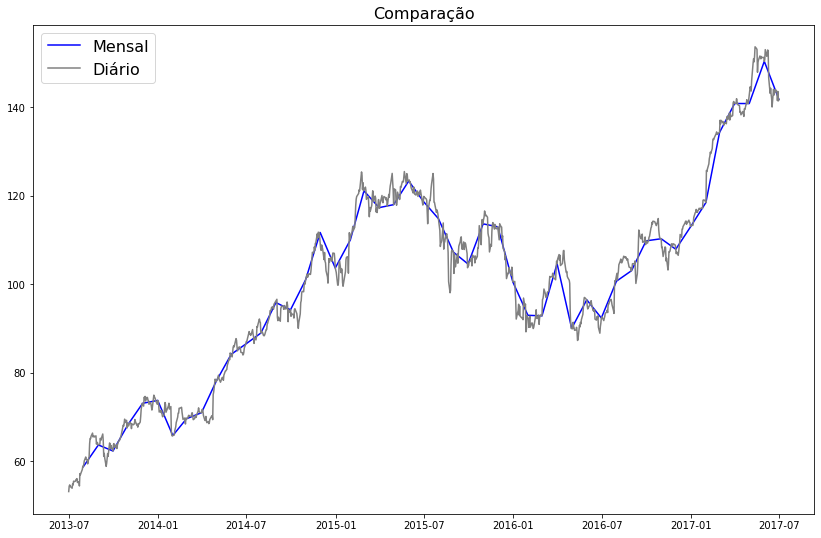

In [15]:
fig = plt.figure(figsize=(14, 9))
plt.plot(preco_reajustado.index,preco_reajustado[apple_ticker],label='Mensal',color='blue')
plt.plot(dados.index,dados[apple_ticker],label='Diário',color='grey')
plt.title('Comparação',fontsize=16)
plt.legend(fontsize=16)


Como eu vou olhar para periodos acumulados, usarei aqui o retorno de log com essa formula: 
$$R_t = log_e(P_t) - log_e(P_{t-1})$$

In [16]:
retorno_log =  np.log(preco_reajustado) - np.log(preco_reajustado.shift(1))

In [17]:
retorno_log.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-09-30,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-10-31,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229
2013-11-30,0.053881,0.066471,0.018283,0.067721,0.000000,0.079976,0.043893,0.052605,0.046134,-0.022150,...,0.045404,-0.016742,0.048996,0.009613,0.135290,0.001738,0.138694,0.044059,0.033812,-0.016240


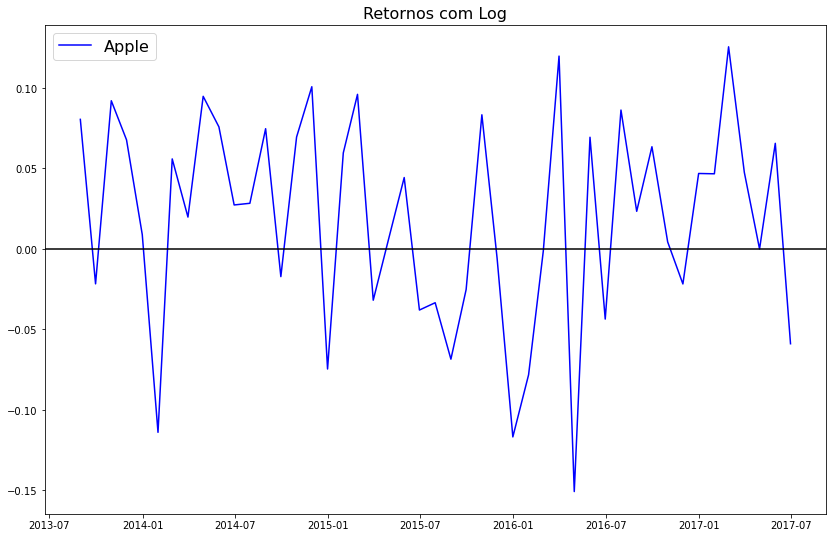

In [18]:
plot(retorno_log,'Retornos com Log')
plt.axhline(y=0.00, color='black', linestyle='-')

vamos comparar o retorno do mês anterior com o mês seguinte.

In [19]:
retorno_ant = retorno_log.shift(1)

In [20]:
retorno_post =  retorno_log.shift(-1)

In [21]:
retorno_ant.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-10-31,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-11-30,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229


In [22]:
retorno_post.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-08-31,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-09-30,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229
2013-10-31,0.053881,0.066471,0.018283,0.067721,0.000000,0.079976,0.043893,0.052605,0.046134,-0.022150,...,0.045404,-0.016742,0.048996,0.009613,0.135290,0.001738,0.138694,0.044059,0.033812,-0.016240
2013-11-30,0.067696,0.072677,0.091973,0.008862,0.086168,-0.003124,0.003659,0.059508,0.053142,0.061626,...,-0.000050,0.032986,0.079351,0.020441,0.071819,0.001157,-0.027009,0.021431,0.021252,0.048255


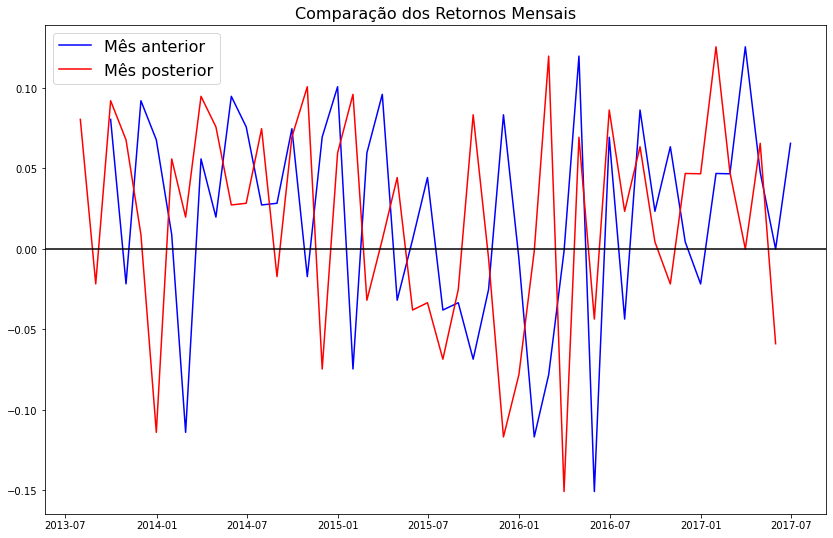

In [23]:
fig = plt.figure(figsize=(14, 9))
plt.plot(retorno_ant.index,retorno_ant[apple_ticker],label='Mês anterior',color='blue')
plt.plot(retorno_post.index,retorno_post[apple_ticker],label='Mês posterior',color='red')
plt.axhline(y=0.00, color='black', linestyle='-')
plt.title('Comparação dos Retornos Mensais',fontsize=16)
plt.legend(fontsize=16)

Um sinal de trading é uma sequência de ações de trading ou um resultado obtido de ações de trading.
Aqui eu vou produzir um portfólio de ações de longo e curto prazo para cada data.
Assim, um trading bot poderia por exemplo interpreta esses sinais como longo ("compre") e curto ("venda").

In [24]:
# função para gerar o sinal de trading
# o n retorna as melhores stocks
def get_top_stocks(dataset,n):
    top_stocks = dataset.copy()
    for i,linha in dataset.iterrows():
        top_stocks.loc[i].loc[linha.nlargest(n).index] = 1.0
        top_stocks.loc[i].loc[set(linha.index) - set(linha.nlargest(n).index)] = 0   
    return top_stocks.astype(np.int)

In [25]:
#vou usar *-1 para pegar as piores e gerar o sinal de 
top_stocks = 50
long_stocks = get_top_stocks(retorno_ant,top_stocks)
short_stocks = get_top_stocks(-1*retorno_ant,top_stocks)

In [26]:
long_stocks.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2013-11-30,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
short_stocks.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2013-11-30,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [28]:
# buscar somente as 10 mais performaticas no lonog e curto
num = 10
top_long = long_stocks.sum().sort_values(ascending=False).index[:num].values.tolist()
top_short = short_stocks.sum().sort_values(ascending=False).index[:num].values.tolist()

In [29]:
print('{} Mais {}:'.format(num, 'top_long'))
print(','.join(top_long))

10 Mais top_long:
INCY,AMD,AVGO,NFLX,NFX,SWKS,ILMN,UAL,NVDA,MU


In [30]:
print('{} Mais {}:'.format(num, 'top_short'))
print(','.join(top_short))

10 Mais top_short:
FCX,RRC,CHK,MRO,GPS,DVN,FTI,WYNN,NEM,KORS


hora de avaliar se portfólio tem potencial de ser rentável.

In [31]:
pos_final = long_stocks - short_stocks
retorno_portfolio = (retorno_post * pos_final) /(2*top_stocks)

In [32]:
retorno_portfolio.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.000000,-0.000000,-0.00000,0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,...,-0.0,-0.00000,-0.00000,-0.0,0.000000,-0.000000,-0.00000,-0.0,-0.000000,-0.0
2013-08-31,0.000000,0.000000,0.00000,-0.000000,0.0,0.0,-0.000000,0.0,0.000000,0.0,...,0.0,0.00000,-0.00000,0.0,0.000000,0.000000,0.00000,0.0,-0.000000,0.0
2013-09-30,-0.000096,-0.001473,0.00000,0.000920,0.0,0.0,-0.001006,0.0,0.000000,0.0,...,-0.0,-0.00000,0.00000,0.0,-0.000000,0.000000,-0.00000,0.0,0.000000,0.0
2013-10-31,0.000000,0.000665,0.00000,-0.000677,0.0,0.0,0.000000,0.0,0.000461,-0.0,...,0.0,-0.00000,-0.00049,0.0,0.000000,0.000017,0.00000,0.0,-0.000338,-0.0
2013-11-30,0.000000,0.000727,0.00092,0.000000,0.0,-0.0,0.000000,0.0,0.000000,0.0,...,-0.0,-0.00033,0.00000,0.0,-0.000718,0.000012,0.00027,0.0,0.000000,0.0


Text(0.5, 1.0, 'Retornos do Portfolio')

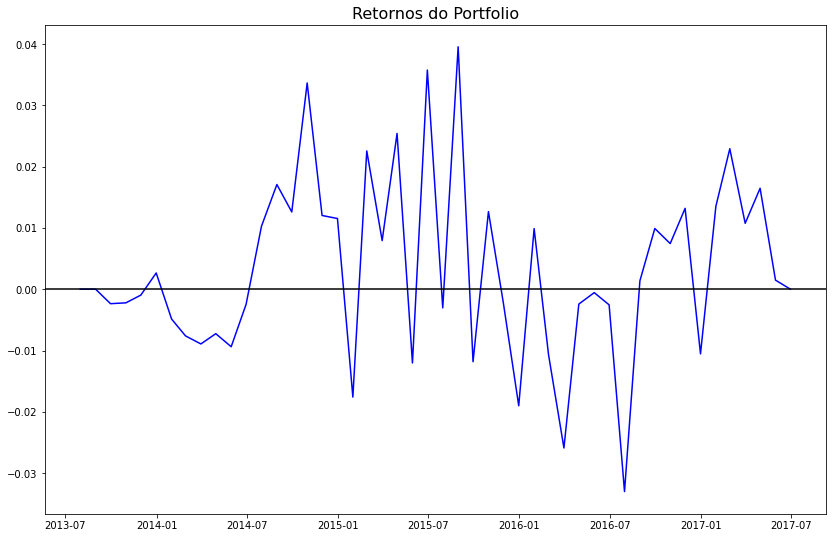

In [33]:
fig = plt.figure(figsize=(14, 9))
plt.plot(retorno_portfolio.index,retorno_portfolio.T.sum(),color='blue')
plt.axhline(y=0.00, color='black', linestyle='-')
plt.title('Retornos do Portfolio',fontsize=16)

In [34]:
retorno_data = retorno_portfolio.T.sum().dropna()
portfolio_ret_media = retorno_data.mean()
portfolio_ret_dp = retorno_data.std()
portfolio_ret_taxa_anual = (np.exp(portfolio_ret_media * 12) - 1) * 100

print("""
Media:                  {:.6f}
Desvio Padrao:          {:.6f}
Taxa de retorno anual:  {:.2f}%
""".format(portfolio_ret_media, portfolio_ret_dp, portfolio_ret_taxa_anual))


Media:                  0.003185
Desvio Padrao:          0.014951
Taxa de retorno anual:  3.90%



Irei fazer um t-test. A hipótese é de que a média de retorno é 0.

In [35]:
from scipy import stats
t_value,p_value = stats.ttest_1samp(retorno_data,0.0)
p_value = p_value/2

Não conseguimos rejeitar a hipotese nula. A média de retorno foi muito proxima a 0 de fato.

In [36]:
print("""
Análise Alpha:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Análise Alpha:
 t-value:        1.476
 p-value:        0.073339



In [37]:
# função que usarei para buscar as 2 top ações de long e short
from darts import TimeSeries
def get_series(ticker):
    dataframe = preco_reajustado.copy()
    dataframe = dataframe.reset_index()
    data = dataframe[['date',ticker]]
    array = np.array(data)
    df = pd.DataFrame(array)
    df = df.rename(columns={0:'ds', 1:'y'})
    return df

In [38]:
incy = get_series('INCY')
incy.head()

,ds,y
0,2013-07-31,23.41
1,2013-08-31,33.89
2,2013-09-30,38.15
3,2013-10-31,39.0
4,2013-11-30,46.6


In [39]:
ser_incy = TimeSeries.from_dataframe(incy, 'ds', 'y')

In [40]:
# vou usar o prophet para fazer as previsões em dados mensais
# é possível com prophet fazer previsões em dados não-diários
from darts.models import Prophet
model = Prophet(daily_seasonality=True,weekly_seasonality=True)
model.fit(ser_incy)

[2021-08-25 09:23:45,218] WARNING | darts.models | Support for AutoARIMA is not available. To enable it, install u8darts[pmdarima] or u8darts[all].


In [41]:
# um periodo de 6 meses para ver a tendência da ação nesse periodo
future = pd.date_range(start='2013/07/31', periods=6, freq='M')

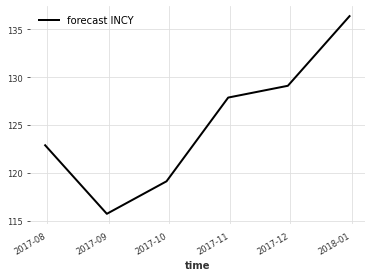

In [42]:
# o modelo para prever os próximos 6 meses
forecast = model.predict(len(future))
forecast.plot(label='forecast INCY')

In [43]:
amd = get_series('AMD')
amd.head()

,ds,y
0,2013-07-31,3.77
1,2013-08-31,3.27
2,2013-09-30,3.81
3,2013-10-31,3.34
4,2013-11-30,3.64


In [44]:
ser_amd = TimeSeries.from_dataframe(amd, 'ds', 'y')

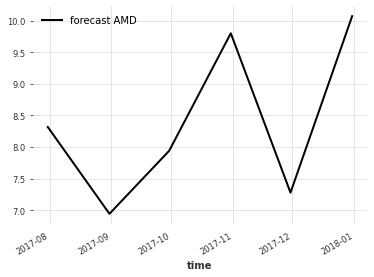

In [45]:
model2 = Prophet(daily_seasonality=True,weekly_seasonality=True)
model2.fit(ser_amd)
forecast2 = model2.predict(len(future))
forecast2.plot(label='forecast AMD')

In [46]:
#repito o processo para as outras ações
fcx = get_series('FCX')
fcx.head()

,ds,y
0,2013-07-31,26.119817
1,2013-08-31,27.911629
2,2013-09-30,30.553166
3,2013-10-31,34.271358
4,2013-11-30,32.341496


In [47]:
ser_fcx = TimeSeries.from_dataframe(fcx, 'ds', 'y')

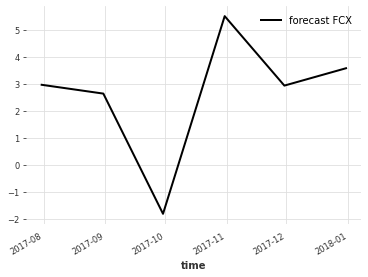

In [48]:
model3 = Prophet(daily_seasonality=True,weekly_seasonality=True)
model3.fit(ser_fcx)
forecast3 = model3.predict(len(future))
forecast3.plot(label='forecast FCX')

In [49]:
rrc = get_series('RRC')
rrc.head()

,ds,y
0,2013-07-31,77.817087
1,2013-08-31,73.763909
2,2013-09-30,74.696957
3,2013-10-31,74.519786
4,2013-11-30,76.429288


In [50]:
ser_rrc = TimeSeries.from_dataframe(rrc, 'ds', 'y')

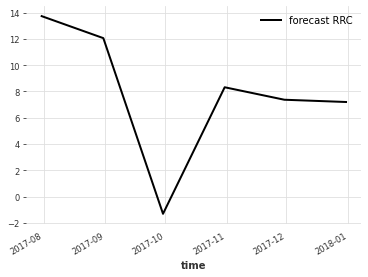

In [51]:
model4 = Prophet(daily_seasonality=True,weekly_seasonality=True)
model4.fit(ser_rrc)
forecast4 = model4.predict(len(future))
forecast4.plot(label='forecast RRC')

Com a previsão gerada a estratégia que escolhi se mostra adequada. Olhando para algumas ações do portfolio.
A incy por exemplo tem uma tendência de alta e a rrc nos primeiros 3 meses tem uma tendência de queda.